In [1]:
# Read in Beige Book estimated topic counts

import pandas as pd
import numpy as np
import os
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Beige Book data
df = pd.read_csv('merged_data.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

topic_data = pd.read_csv('aggregated_predictions_monthly.csv')
sentiment_data = pd.read_csv('sentiment_all_Beige_Book_chunks.csv')

# Drop duplicates from sentiment data
sentiment_data = sentiment_data.drop_duplicates()

topic_data['DATE'] = pd.to_datetime(topic_data['DATE'])
sentiment_data['DATE'] = pd.to_datetime(sentiment_data['DATE'])

# Merge on DATE
merged_data = pd.merge(topic_data, sentiment_data, on='DATE', how='outer')

# Calculate tone per Filippou et al. (2024)
merged_data['tone'] = (merged_data['count_positive'] - merged_data['count_negative']) / (merged_data['count_positive'] + merged_data['count_negative'])

In [2]:
# Correlation between tone and normalized_sentiment
    # Essentially the same thing 
print(merged_data[['tone', 'normalized_sentiment']].corr())

                          tone  normalized_sentiment
tone                  1.000000              0.986217
normalized_sentiment  0.986217              1.000000


# Simple count

In [3]:
# Topic columns
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]

# Sum the topic counts for each quarter
df['Negative_Comments'] = df[topic_columns].sum(axis=1)  


In [5]:
df.head()

,DATE,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,Outlook,Labor,Capital,Trade,real_GDP_change,Negative_Comments
0,1970-04-01,24,21,30,7,7,18,9,3,6,13,28,14,1,0.6,181
1,1970-07-01,43,25,29,10,7,24,3,6,3,10,26,23,3,3.7,212
2,1970-10-01,33,24,40,12,8,29,4,7,3,5,42,12,0,-4.2,219
3,1971-01-01,21,29,39,8,5,30,6,8,1,10,22,17,1,11.3,197
4,1971-04-01,26,22,29,6,4,28,7,8,1,7,20,14,1,2.2,173


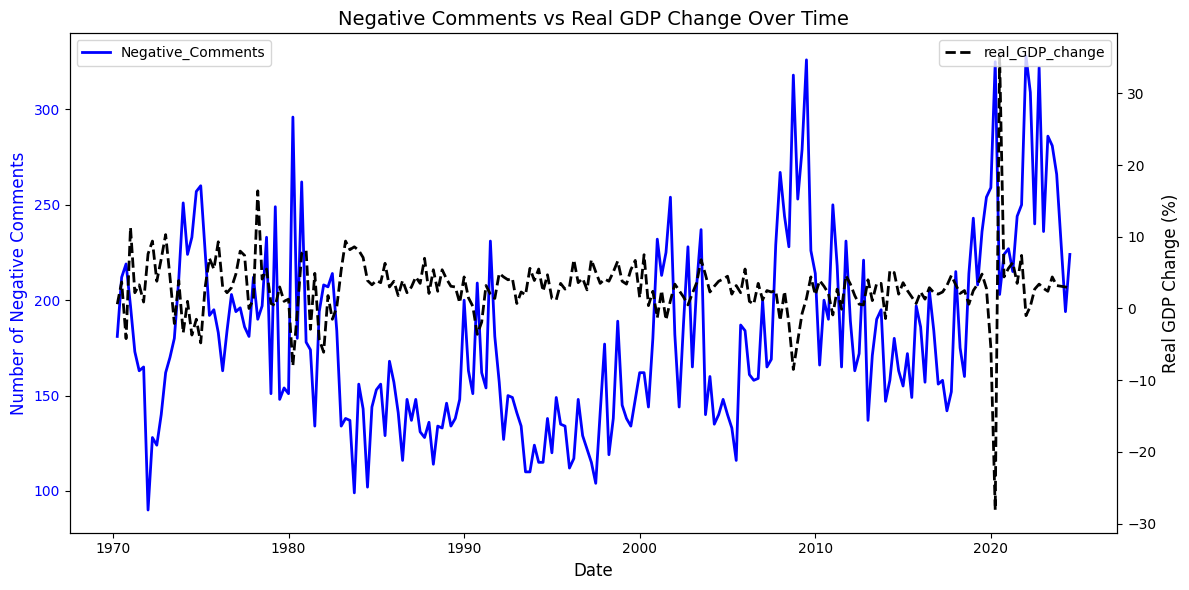

In [4]:
# Plotting sum of negative comments
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Negative_Comments on the primary y-axis
ax1.plot(df["DATE"], df["Negative_Comments"], label="Negative_Comments", color="blue", linewidth=2)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Number of Negative Comments", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create secondary y-axis for real_GDP_change
ax2 = ax1.twinx()
ax2.plot(df["DATE"], df["real_GDP_change"], label="real_GDP_change", color="black", linestyle="--", linewidth=2)
ax2.set_ylabel("Real GDP Change (%)", fontsize=12, color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Add a title and improve layout
plt.title("Negative Comments vs Real GDP Change Over Time", fontsize=14)
fig.tight_layout()

# Add legends for both y-axes
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

# Show the plot
plt.show()


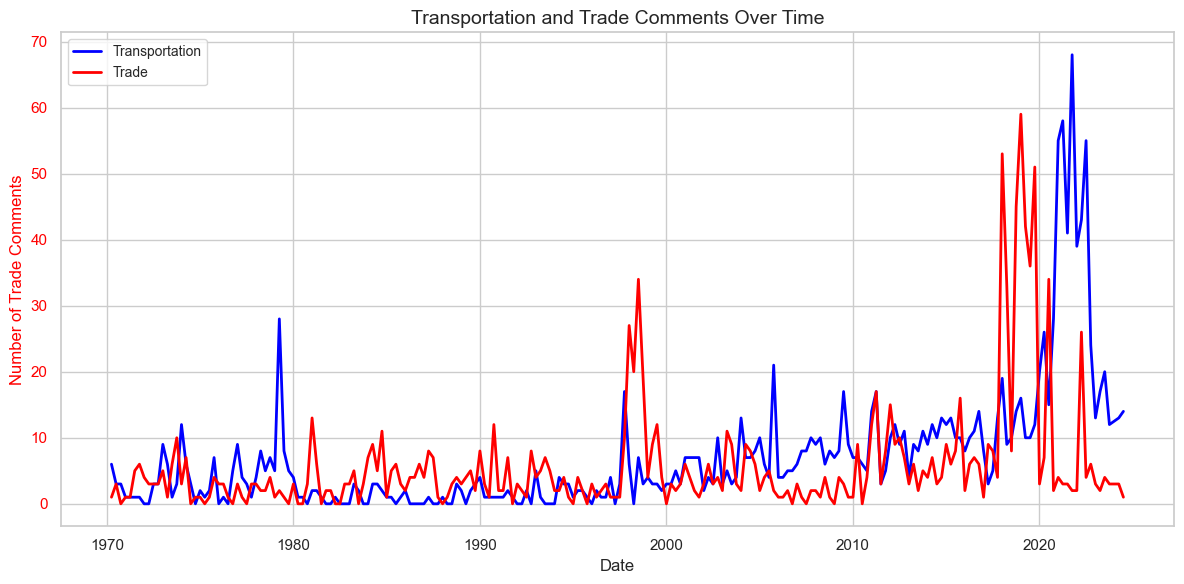

In [126]:
# Plot line chart of transportation and trade over time
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Transportation on the primary y-axis
ax.plot(df["DATE"], df["Transportation"], label="Transportation", color="blue", linewidth=2)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Transportation Comments", fontsize=12, color="blue")
ax.tick_params(axis='y', labelcolor="blue")

# Plot trade on same axis
ax.plot(df["DATE"], df["Trade"], label="Trade", color="red", linewidth=2)
ax.set_ylabel("Number of Trade Comments", fontsize=12, color="red")
ax.tick_params(axis='y', labelcolor="red")

# Add a title and improve layout
plt.title("Transportation and Trade Comments Over Time", fontsize=14)
fig.tight_layout()

# Add legends for both y-axes
ax.legend(loc="upper left", fontsize=10)

# Show the plot
plt.show()

In [125]:
df

,DATE,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,...,Capital,Trade,real_GDP_change,PC1,PC2,PC3,PC4,PC5,Total,Negative_Comments
0,1970-04-01,24,21,30,7,7,18,9,3,6,...,14,1,0.6,9.270464,-1.913534,-20.940387,-2.882628,3.460780,181,181
1,1970-07-01,43,25,29,10,7,24,3,6,3,...,23,3,3.7,0.176012,-1.027444,-29.885939,-6.649310,7.302104,212,212
2,1970-10-01,33,24,40,12,8,29,4,7,3,...,12,0,-4.2,7.581538,8.039540,-31.290199,-8.487481,-2.688041,219,219
3,1971-01-01,21,29,39,8,5,30,6,8,1,...,17,1,11.3,2.286100,3.252825,-19.810760,-13.847691,10.783028,197,197
4,1971-04-01,26,22,29,6,4,28,7,8,1,...,14,1,2.2,1.442696,-6.278336,-17.427821,-9.361812,8.776531,173,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2023-04-01,5,42,37,7,25,49,29,11,17,...,3,2,2.4,16.741905,37.363106,7.992045,-12.559807,14.193034,286,286
213,2023-07-01,5,55,36,9,36,29,25,7,20,...,2,4,4.4,28.293549,39.331916,5.377557,-7.080343,4.934316,281,281
214,2023-10-01,1,28,50,7,39,47,12,4,12,...,5,3,3.2,12.967443,38.284394,2.535416,-6.397041,-14.636958,266,266
215,2024-04-01,2,36,24,4,24,30,16,9,13,...,3,3,3.0,19.358885,10.293371,8.073903,-7.059927,2.192667,194,194


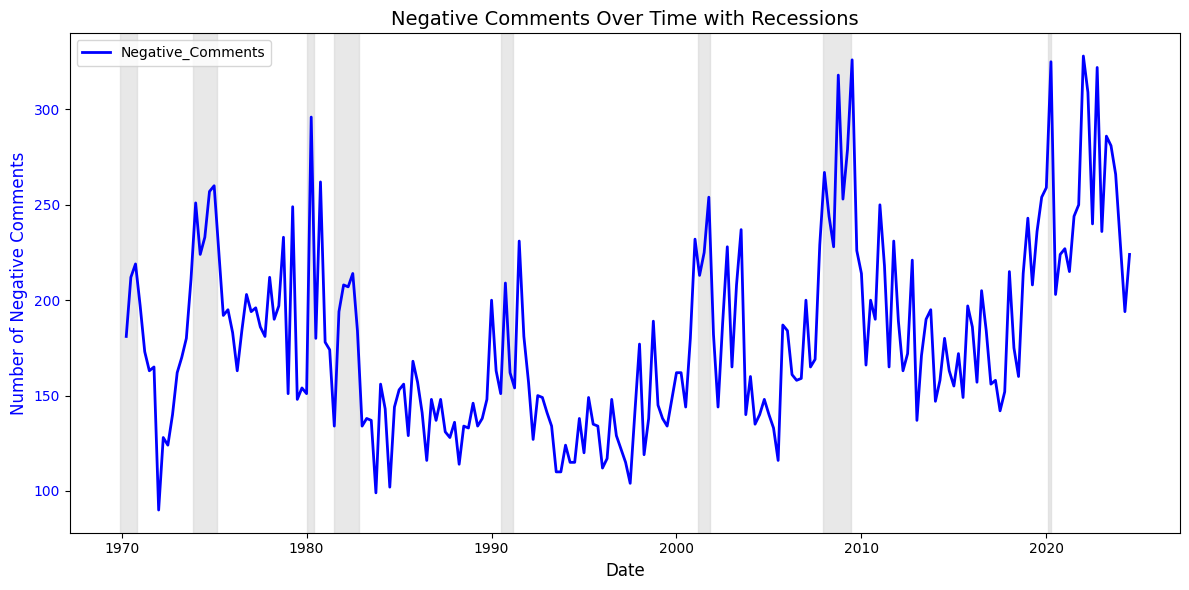

In [11]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Negative_Comments on the primary y-axis
ax1.plot(df["DATE"], df["Negative_Comments"], label="Negative_Comments", color="blue", linewidth=2)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Number of Negative Comments", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add recession bars
plt.axvspan("1969-12-01", "1970-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1973-11-01", "1975-03-01", color='lightgray', alpha=0.5)
plt.axvspan("1980-01-01", "1980-06-01", color='lightgray', alpha=0.5)
plt.axvspan("1981-07-01", "1982-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1990-07-01", "1991-03-01", color='lightgray', alpha=0.5)
plt.axvspan("2001-03-01", "2001-11-01", color='lightgray', alpha=0.5)
plt.axvspan("2007-12-01", "2009-06-01", color='lightgray', alpha=0.5)
plt.axvspan("2020-02-01", "2020-04-01", color='lightgray', alpha=0.5)

# Add a title and improve layout
plt.title("Negative Comments Over Time with Recessions", fontsize=14)
fig.tight_layout()

# Add legends for both y-axes
ax1.legend(loc="upper left", fontsize=10)

# Show the plot
plt.show()


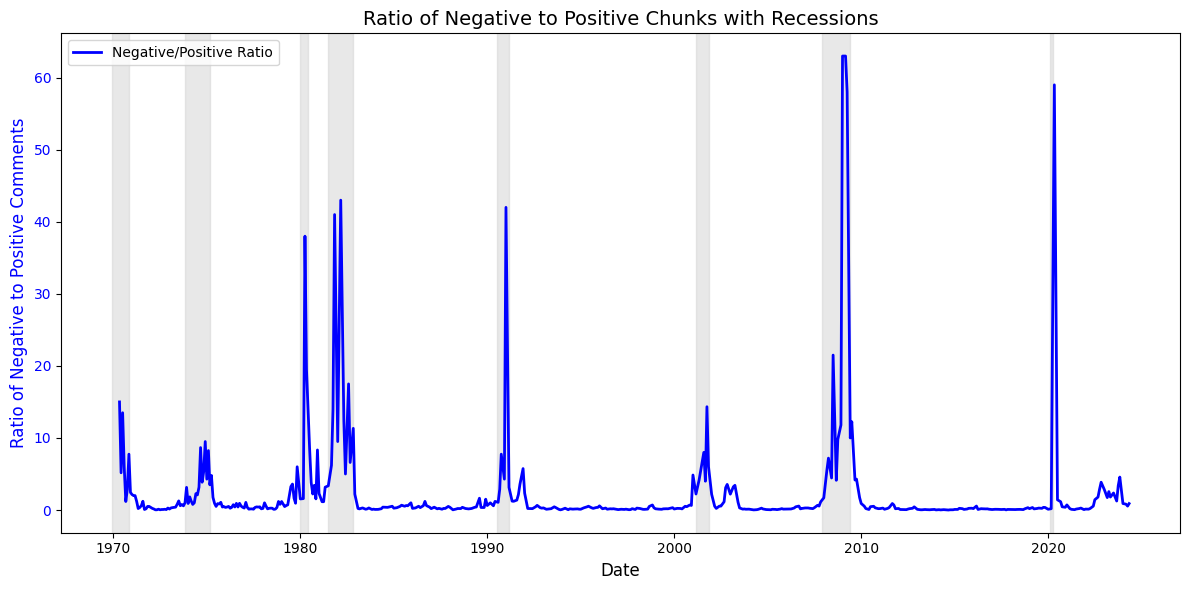

In [50]:
merged_data['sentiment_ratio'] = merged_data['fraction_negative'] / merged_data['fraction_positive']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Negative_Comments on the primary y-axis
ax1.plot(merged_data["DATE"], merged_data["negative_positive_ratio"], label="Negative/Positive Ratio", color="blue", linewidth=2)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Ratio of Negative to Positive Comments", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add recession bars
plt.axvspan("1969-12-01", "1970-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1973-11-01", "1975-03-01", color='lightgray', alpha=0.5)
plt.axvspan("1980-01-01", "1980-06-01", color='lightgray', alpha=0.5)
plt.axvspan("1981-07-01", "1982-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1990-07-01", "1991-03-01", color='lightgray', alpha=0.5)
plt.axvspan("2001-03-01", "2001-11-01", color='lightgray', alpha=0.5)
plt.axvspan("2007-12-01", "2009-06-01", color='lightgray', alpha=0.5)
plt.axvspan("2020-02-01", "2020-04-01", color='lightgray', alpha=0.5)

# Add a title and improve layout
plt.title("Ratio of Negative to Positive Chunks with Recessions", fontsize=14)
fig.tight_layout()

# Add legends for both y-axes
ax1.legend(loc="upper left", fontsize=10)

# Show the plot
plt.show()


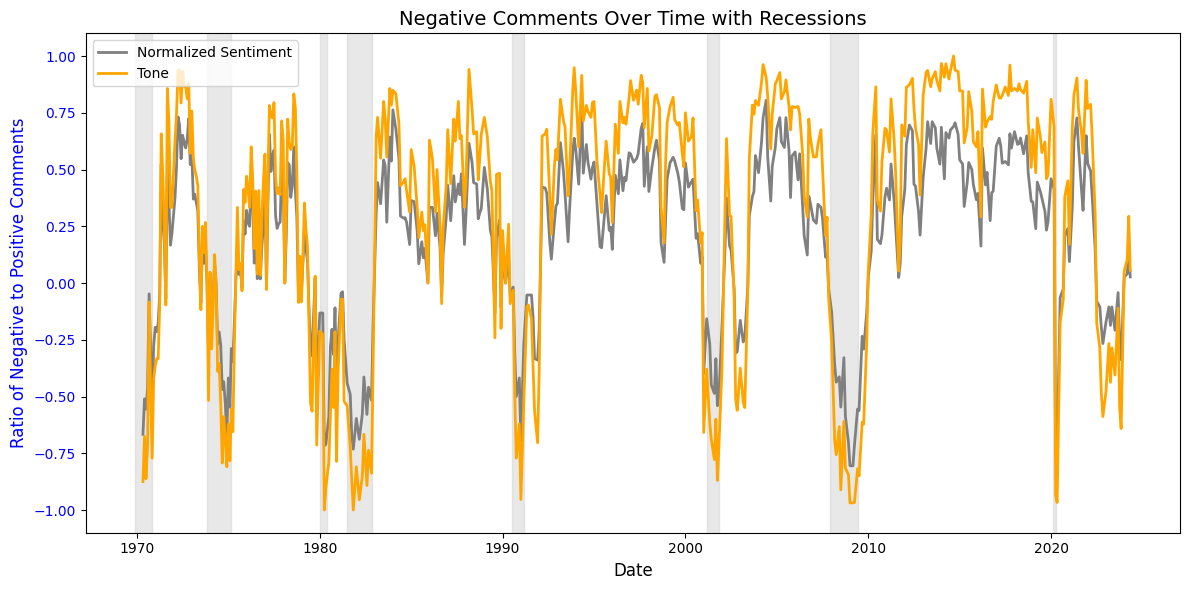

In [58]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Normalized sentiment
ax1.plot(merged_data["DATE"], merged_data["normalized_sentiment"], label="Normalized Sentiment", color="gray", linewidth=2)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Ratio of Negative to Positive Comments", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Also plot tone
ax1.plot(merged_data["DATE"], merged_data["tone"], label="Tone", color="orange", linewidth=2)

# Add recession bars
plt.axvspan("1969-12-01", "1970-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1973-11-01", "1975-03-01", color='lightgray', alpha=0.5)
plt.axvspan("1980-01-01", "1980-06-01", color='lightgray', alpha=0.5)
plt.axvspan("1981-07-01", "1982-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1990-07-01", "1991-03-01", color='lightgray', alpha=0.5)
plt.axvspan("2001-03-01", "2001-11-01", color='lightgray', alpha=0.5)
plt.axvspan("2007-12-01", "2009-06-01", color='lightgray', alpha=0.5)
plt.axvspan("2020-02-01", "2020-04-01", color='lightgray', alpha=0.5)

# Add a title and improve layout
plt.title("Negative Comments Over Time with Recessions", fontsize=14)
fig.tight_layout()

# Add legends for both y-axes
ax1.legend(loc="upper left", fontsize=10)

# Show the plot
plt.show()


# Relative frequencies

In [62]:
# Relative frequencies:
     # Normalize topic counts for each quarter by the total counts across all topics for that quarter.
     # So, each row adds up to 100%: It's the percent of the mentions that are about that topic during that quarter.

# Topic columns
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]

# Calculate relative frequencies
relative_frequencies = df.copy()
relative_frequencies[topic_columns] = relative_frequencies[topic_columns].div(
    relative_frequencies[topic_columns].sum(axis=1), axis=0
)

print("Relative Frequencies:\n", relative_frequencies.head())


Relative Frequencies:
          DATE  Employment    Prices  Consumption  Manufacturing  Construction  \
0  1970-04-01    0.132597  0.116022     0.165746       0.038674      0.038674   
1  1970-07-01    0.202830  0.117925     0.136792       0.047170      0.033019   
2  1970-10-01    0.150685  0.109589     0.182648       0.054795      0.036530   
3  1971-01-01    0.106599  0.147208     0.197970       0.040609      0.025381   
4  1971-04-01    0.150289  0.127168     0.167630       0.034682      0.023121   

    Lending  Uncertainty  Resources  Transportation   Outlook     Labor  \
0  0.099448     0.049724   0.016575        0.033149  0.071823  0.154696   
1  0.113208     0.014151   0.028302        0.014151  0.047170  0.122642   
2  0.132420     0.018265   0.031963        0.013699  0.022831  0.191781   
3  0.152284     0.030457   0.040609        0.005076  0.050761  0.111675   
4  0.161850     0.040462   0.046243        0.005780  0.040462  0.115607   

    Capital     Trade  real_GDP_change 

In [112]:
# Correlation between topics and real_GDP_change
correlations = relative_frequencies[topic_columns].apply(lambda x: x.corr(relative_frequencies["real_GDP_change"]))
print("Correlations:\n", correlations)

Correlations:
 Employment       -0.146164
Prices            0.195675
Consumption      -0.247333
Manufacturing    -0.275426
Construction     -0.140049
Lending           0.136642
Uncertainty      -0.001473
Resources         0.071864
Transportation    0.023352
Outlook          -0.226517
Labor             0.159786
Capital           0.005084
Trade             0.176120
dtype: float64


# Standardized scores

In [ ]:
# Gives, in standard deviations, how different the mentions were during that quarter from a normal quarter for that topic

# Calculate mean and std for each topic
means = df[topic_columns].mean()
stds = df[topic_columns].std()

# Compute Z-scores
z_scores = df.copy()
z_scores[topic_columns] = (z_scores[topic_columns] - means) / stds

# Compute Z-scores for real_GDP_change as well
z_scores["real_GDP_change"] = (z_scores["real_GDP_change"] - z_scores["real_GDP_change"].mean()) / z_scores["real_GDP_change"].std()

print("Standardized Scores (Z-Scores):\n", z_scores.head())


Standardized Scores (Z-Scores):
          DATE  Employment    Prices  Consumption  Manufacturing  Construction  \
0  1970-04-01    1.277278  0.384652     0.284646      -0.227970     -1.171616   
1  1970-07-01    3.340842  0.703542     0.200493       0.128781     -1.171616   
2  1970-10-01    2.254756  0.623820     1.126172       0.366615     -1.087290   
3  1971-01-01    0.951452  1.022432     1.042020      -0.109053     -1.340266   
4  1971-04-01    1.494495  0.464375     0.200493      -0.346886     -1.424591   

    Lending  Uncertainty  Resources  Transportation   Outlook     Labor  \
0 -1.451694    -0.093443  -1.488709       -0.108586  1.718910  0.807282   
1 -0.857508    -0.730422  -1.064016       -0.409391  1.122104  0.667530   
2 -0.362353    -0.624259  -0.922452       -0.409391  0.127429  1.785553   
3 -0.263322    -0.411933  -0.780887       -0.609928  1.122104  0.388024   
4 -0.461384    -0.305769  -0.780887       -0.609928  0.525299  0.248271   

    Capital     Trade  real_G

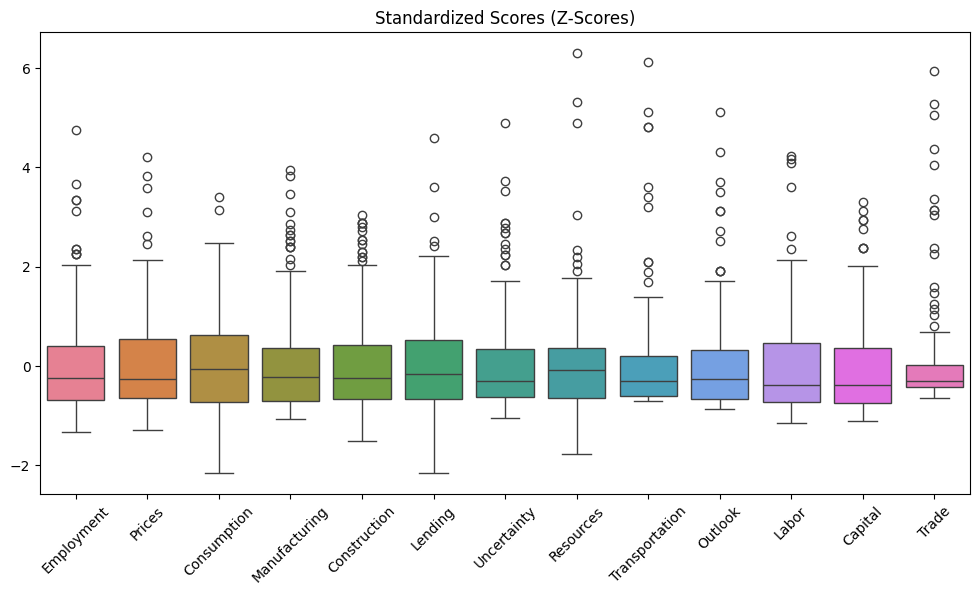

In [85]:
# Plot standardized scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=z_scores[topic_columns])
plt.xticks(rotation=45)
plt.title("Standardized Scores (Z-Scores)")
plt.show()

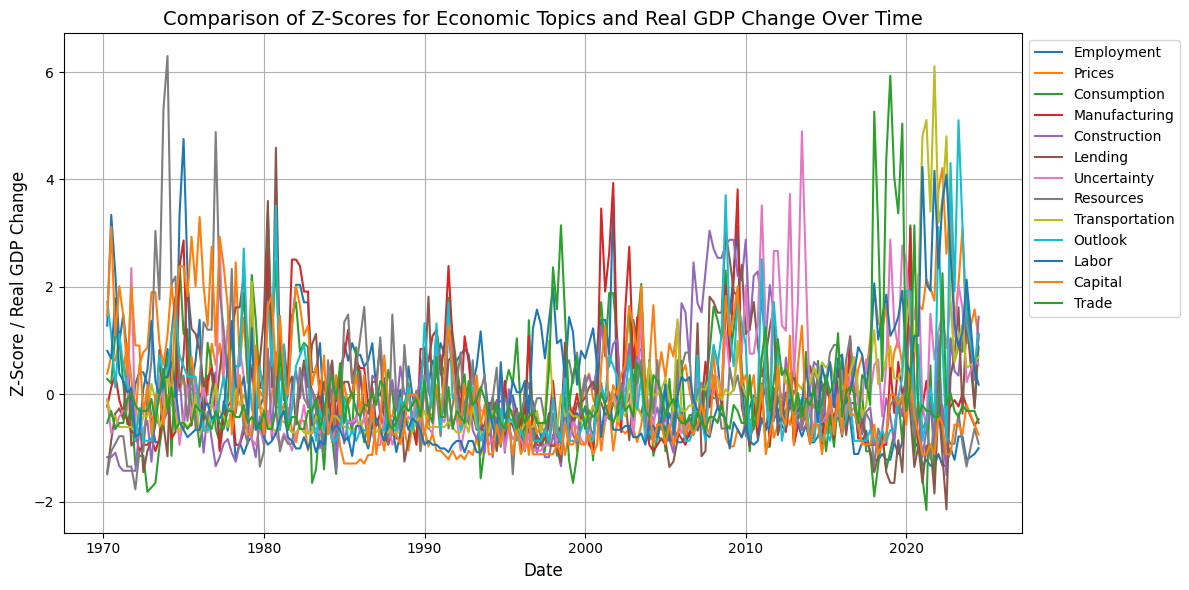

In [ ]:
# Ensure the DATE column is in datetime format
z_scores["DATE"] = pd.to_datetime(z_scores["DATE"])

# Plotting
plt.figure(figsize=(12, 6))

# Plotting z-scores for economic topics
for column in z_scores.columns[1:-1]:  # Exclude DATE and real_GDP_change
    plt.plot(z_scores["DATE"], z_scores[column], label=column)

# Plotting real_GDP_change
#plt.plot(
#    z_scores["DATE"], 
 #   z_scores["real_GDP_change"], 
  #  label="real_GDP_change", 
   # linewidth=2, 
    #linestyle="--", 
    #color="black")

# Adding labels, title, and legend
plt.title("Comparison of Z-Scores for Economic Topics and Real GDP Change Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Z-Score / Real GDP Change", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

# Well, that's overwhelming!


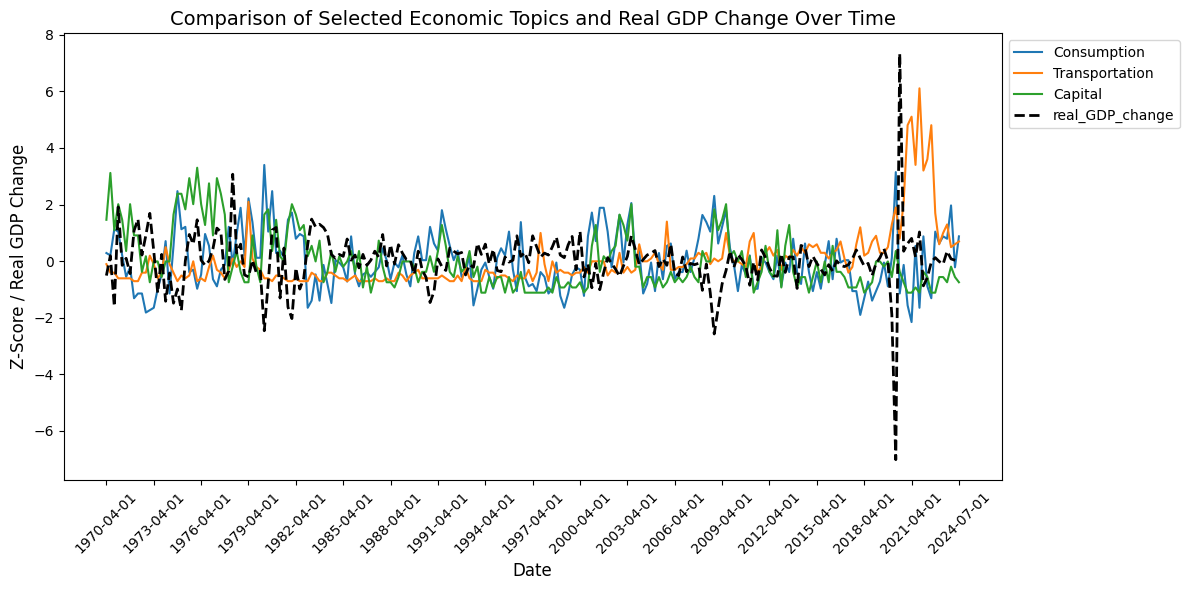

In [97]:
# Just doing consumption, transportation, and capital along with GDP

# Selected columns to plot
selected_columns = ["Consumption", "Transportation", "Capital", "real_GDP_change"]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting selected topics
for column in selected_columns[:-1]:  # Exclude real_GDP_change for special styling
    plt.plot(z_scores["DATE"], z_scores[column], label=column)

# Plotting real_GDP_change with a different style
plt.plot(
    z_scores["DATE"], 
    z_scores["real_GDP_change"], 
    label="real_GDP_change", 
    linewidth=2, 
    linestyle="--", 
    color="black"
)

# Adding labels, title, and legend
plt.title("Comparison of Selected Economic Topics and Real GDP Change Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Z-Score / Real GDP Change", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Clean up the x-axis date formatting
plt.xticks(z_scores["DATE"][::12], rotation=45, fontsize=10)  # Show every 12th date for better spacing
plt.tight_layout()

# Remove grid lines
plt.gca().grid(False)

# Display the plot
plt.show()


# Variance over time

In [64]:
# Calculate the variance of topic counts over a rolling window (last 4 quarters).
rolling_variance = df.copy()
rolling_variance[topic_columns] = rolling_variance[topic_columns].rolling(window=4).var()

print("Rolling Variance:\n", rolling_variance.head(10))


Rolling Variance:
          DATE  Employment     Prices  Consumption  Manufacturing  \
0  1970-04-01         NaN        NaN          NaN            NaN   
1  1970-07-01         NaN        NaN          NaN            NaN   
2  1970-10-01         NaN        NaN          NaN            NaN   
3  1971-01-01   98.250000  10.916667    33.666667       4.916667   
4  1971-04-01   90.916667   8.666667    36.916667       6.666667   
5  1971-07-01   38.916667  10.916667    88.666667       9.583333   
6  1971-10-01   57.666667  19.583333    67.333333       4.333333   
7  1972-01-01   58.250000  56.000000    58.000000       2.250000   
8  1972-04-01   21.583333  57.583333    36.666667       4.250000   
9  1972-07-01   14.333333  48.250000    34.916667       2.250000   

   Construction    Lending  Uncertainty  Resources  Transportation    Outlook  \
0           NaN        NaN          NaN        NaN             NaN        NaN   
1           NaN        NaN          NaN        NaN             NaN    

In [115]:
# Correlation of toipc counts with real_GDP_change
correlations = rolling_variance[topic_columns].apply(lambda x: x.corr(rolling_variance["real_GDP_change"]))

# Much weaker correlations with variance, which is what we would expect:
print("Correlations:\n", correlations)



Correlations:
 Employment       -0.059277
Prices            0.041514
Consumption       0.031956
Manufacturing    -0.066768
Construction     -0.012853
Lending          -0.091827
Uncertainty       0.021039
Resources        -0.058231
Transportation    0.000926
Outlook          -0.082554
Labor             0.066555
Capital          -0.027476
Trade            -0.028017
dtype: float64


# Rolling averages

In [124]:
# Smooth topic counts using rolling averages to highlight trends.
     # Using a four-quarter rolling average here
rolling_average = df.copy()
rolling_average[topic_columns] = rolling_average[topic_columns].rolling(window=4).mean()

# correlations between topics and real_GDP_change
correlations = rolling_average[topic_columns].apply(lambda x: x.corr(rolling_average["real_GDP_change"]))
print("Correlations:\n", correlations)

Correlations:
 Employment       -0.018162
Prices           -0.019977
Consumption      -0.208057
Manufacturing    -0.147956
Construction     -0.232468
Lending          -0.117053
Uncertainty      -0.059741
Resources        -0.083414
Transportation   -0.034999
Outlook          -0.156926
Labor             0.031271
Capital           0.019833
Trade            -0.008567
dtype: float64


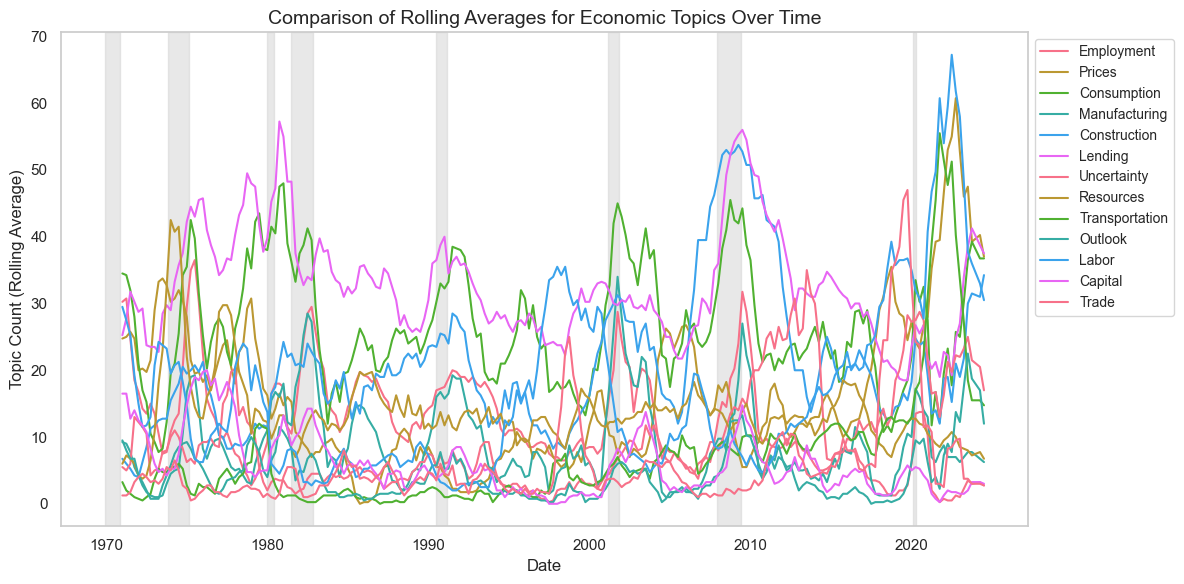

In [117]:
# Ensure the DATE column is in datetime format
rolling_average["DATE"] = pd.to_datetime(rolling_average["DATE"])

# Plot rolling averages over time along with recession bars
plt.figure(figsize=(12, 6))

# Plotting rolling averages for economic topics
for column in topic_columns:
    plt.plot(rolling_average["DATE"], rolling_average[column], label=column)

# Add recession bars
plt.axvspan("1969-12-01", "1970-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1973-11-01", "1975-03-01", color='lightgray', alpha=0.5)
plt.axvspan("1980-01-01", "1980-06-01", color='lightgray', alpha=0.5)
plt.axvspan("1981-07-01", "1982-11-01", color='lightgray', alpha=0.5)
plt.axvspan("1990-07-01", "1991-03-01", color='lightgray', alpha=0.5)
plt.axvspan("2001-03-01", "2001-11-01", color='lightgray', alpha=0.5)
plt.axvspan("2007-12-01", "2009-06-01", color='lightgray', alpha=0.5)
plt.axvspan("2020-02-01", "2020-04-01", color='lightgray', alpha=0.5)

# Adding labels, title, and legend
plt.title("Comparison of Rolling Averages for Economic Topics Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Topic Count (Rolling Average)", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

In [120]:
chunk_predictions

,Filename,Text,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,Outlook,Labor,Capital,Trade
0,1970_at (1)_chunk_1.txt,"December 9 , 1970 The economy of the Southeast...",1,0,0,0,0,0,0,0,0,0,0,0,0
1,1970_at (1)_chunk_2.txt,be dropping 300 employees by the end of the ye...,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1970_at (1)_chunk_3.txt,percent above the year-ago level . This prompt...,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1970_at (1)_chunk_4.txt,"lowering of interest rates '' , '' improving c...",0,1,0,0,0,0,0,0,0,0,0,0,0
4,1970_at (2)_chunk_1.txt,"November 11 , 1970 Our directors report a weak...",1,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29516,2024_sl (8)_chunk_1.txt,"Beige Book Report : St Louis January 17 , 2024...",0,0,0,0,0,1,0,0,0,0,0,0,0
29517,2024_sl (8)_chunk_2.txt,modestly since our previous report . Multiple ...,0,1,1,0,0,0,0,0,0,0,0,0,0
29518,2024_sl (8)_chunk_3.txt,numbers in early 2024 . Manufacturing Manufact...,0,0,0,0,0,0,0,0,0,0,1,0,0
29519,2024_sl (8)_chunk_4.txt,"Rock metros . In the Louisville metro area , y...",0,0,0,0,0,1,0,1,0,0,0,0,0


# Statistical analysis

## Correlations

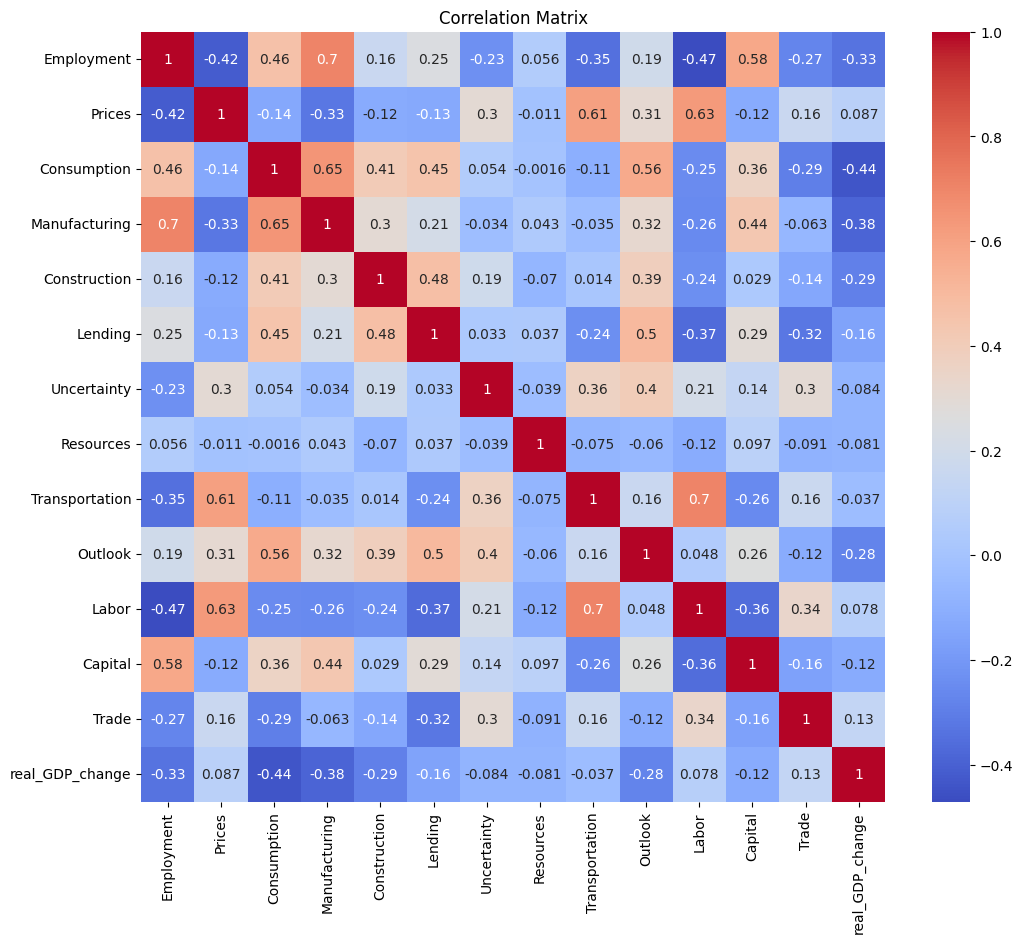

In [66]:
# Correlations

# Save a numerical df that drops the date column
df_numerical = df.drop(columns=['DATE'])

# Look at correlations
correlations = df_numerical.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
# Lagged correlations

# Shift topic columns to calculate lagged correlations
lagged_merged_df = df_numerical.copy()
for topic in topic_columns:
    lagged_merged_df[f"{topic}_lag"] = lagged_merged_df[topic].shift(1)

# Calculate lagged correlations
lagged_correlations = lagged_merged_df.corr()["real_GDP_change"][[f"{topic}_lag" for topic in topic_columns]]

print("Lagged Correlations with GDP Growth:\n", lagged_correlations)


Lagged Correlations with GDP Growth:
 Employment_lag        0.009805
Prices_lag           -0.068187
Consumption_lag      -0.037645
Manufacturing_lag    -0.051425
Construction_lag     -0.175885
Lending_lag          -0.115957
Uncertainty_lag      -0.067804
Resources_lag        -0.007089
Transportation_lag    0.002100
Outlook_lag          -0.137716
Labor_lag             0.034005
Capital_lag          -0.005860
Trade_lag            -0.003470
Name: real_GDP_change, dtype: float64


## Regression

In [68]:
import statsmodels.api as sm

# Prepare data
X = df[topic_columns]  # Independent variables (topics)
y = df["real_GDP_change"]  # Dependent variable (GDP growth)

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the full summary table
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        real_GDP_change   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     6.275
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           6.86e-10
Time:                        09:59:13   Log-Likelihood:                -592.72
No. Observations:                 217   AIC:                             1213.
Df Residuals:                     203   BIC:                             1261.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1279      1.707      5.

In [69]:
# Simple regression between GDP growth and each topic
for topic in topic_columns:
    # Prepare data
    X = df[topic]  # Independent variable (topic)
    y = df["real_GDP_change"]  # Dependent variable (GDP growth)

    # Add a constant for the intercept
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Display the full summary table
    print(f"\n\nRegression Results for {topic}:\n")

    print(model.summary())





Regression Results for Employment:

                            OLS Regression Results                            
Dep. Variable:        real_GDP_change   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     26.97
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.79e-07
Time:                        09:59:13   Log-Likelihood:                -616.55
No. Observations:                 217   AIC:                             1237.
Df Residuals:                     215   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [70]:
# Stepwise regression - Forward selection

import statsmodels.api as sm

def forward_selection(X, y, significance_level=0.05):
    """
    Perform forward stepwise regression.
    X: DataFrame of predictors.
    y: Series of the dependent variable.
    significance_level: Threshold for adding variables (default is 0.05).
    """
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []

    while len(remaining_features) > 0:
        candidate_feature = None
        best_p_value = significance_level

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            p_value = model.pvalues[feature]
            if p_value < best_p_value:
                best_p_value = p_value
                candidate_feature = feature

        if candidate_feature is not None:
            initial_features.append(candidate_feature)
            remaining_features.remove(candidate_feature)
            best_features.append(candidate_feature)
            print(f"Adding feature: {candidate_feature} (p-value: {best_p_value:.4f})")
        else:
            break

    final_model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
    return final_model, best_features

# Prepare data
X = df[topic_columns]  # Independent variables
y = df["real_GDP_change"]  # Dependent variable

# Perform forward selection
model, selected_features = forward_selection(X, y)
print("\nSelected Features:", selected_features)
print(model.summary())


Adding feature: Consumption (p-value: 0.0000)
Adding feature: Employment (p-value: 0.0159)
Adding feature: Transportation (p-value: 0.0189)
Adding feature: Construction (p-value: 0.0466)

Selected Features: ['Consumption', 'Employment', 'Transportation', 'Construction']
                            OLS Regression Results                            
Dep. Variable:        real_GDP_change   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     17.70
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.50e-12
Time:                        09:59:13   Log-Likelihood:                -598.11
No. Observations:                 217   AIC:                             1206.
Df Residuals:                     212   BIC:                             1223.
Df Model:                           4                                         
Covariance Type:  

## Granger causality

Does one time series (e.g. a topic) predict another (GDP growth)?

In [71]:
from statsmodels.tsa.stattools import grangercausalitytests

# Do a Granger causality test for each topic
for topic in topic_columns:
    # Perform the test
    results = grangercausalitytests(df[[topic, "real_GDP_change"]], maxlag=4, verbose=False)

    # Extract the p-values
    p_values = [results[i + 1][0]["ssr_ftest"][1] for i in range(4)]

    # Print the results
    print(f"\nGranger Causality Test for {topic}:")
    for i, p_value in enumerate(p_values):
        print(f"Lag {i + 1}: p-value = {p_value:.4f}")


Granger Causality Test for Employment:
Lag 1: p-value = 0.3714
Lag 2: p-value = 0.1621
Lag 3: p-value = 0.0218
Lag 4: p-value = 0.0196

Granger Causality Test for Prices:
Lag 1: p-value = 0.7576
Lag 2: p-value = 0.2720
Lag 3: p-value = 0.4153
Lag 4: p-value = 0.4535

Granger Causality Test for Consumption:
Lag 1: p-value = 0.6489
Lag 2: p-value = 0.1087
Lag 3: p-value = 0.0661
Lag 4: p-value = 0.0122

Granger Causality Test for Manufacturing:
Lag 1: p-value = 0.0477
Lag 2: p-value = 0.0506
Lag 3: p-value = 0.0336
Lag 4: p-value = 0.1123

Granger Causality Test for Construction:
Lag 1: p-value = 0.6467
Lag 2: p-value = 0.4470
Lag 3: p-value = 0.2794
Lag 4: p-value = 0.3241

Granger Causality Test for Lending:
Lag 1: p-value = 0.5568
Lag 2: p-value = 0.2158
Lag 3: p-value = 0.2426
Lag 4: p-value = 0.2757

Granger Causality Test for Uncertainty:
Lag 1: p-value = 0.5983
Lag 2: p-value = 0.1296
Lag 3: p-value = 0.2203
Lag 4: p-value = 0.4290

Granger Causality Test for Resources:
Lag 1: p-

c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14

### Granger causality with relative freqs

In [72]:
from statsmodels.tsa.stattools import grangercausalitytests

# Ensure data is sorted by DATE
relative_frequencies = relative_frequencies.sort_values("DATE")

# Define dependent variable (GDP growth) and independent variables (topics)
dependent_variable = "real_GDP_change"
independent_variables = topic_columns

# Loop through topics and perform Granger causality tests
results = {}
max_lag = 4  # Define the maximum lag to test

for topic in independent_variables:
    print(f"\nGranger Causality Test for {topic}:")
    data = relative_frequencies[[dependent_variable, topic]].dropna()  # Ensure no missing values
    result = grangercausalitytests(data, maxlag=max_lag, verbose=False)  # Set verbose=True for detailed output
    results[topic] = {lag: test[0]["ssr_chi2test"][1] for lag, test in result.items()}  # Extract p-values
    for lag, p_value in results[topic].items():
        print(f"Lag {lag}: p-value = {p_value:.4f}")



Granger Causality Test for Employment:
Lag 1: p-value = 0.3788
Lag 2: p-value = 0.0446
Lag 3: p-value = 0.0390
Lag 4: p-value = 0.1152

Granger Causality Test for Prices:
Lag 1: p-value = 0.8025
Lag 2: p-value = 0.6607
Lag 3: p-value = 0.2656
Lag 4: p-value = 0.3494

Granger Causality Test for Consumption:
Lag 1: p-value = 0.7905
Lag 2: p-value = 0.9524
Lag 3: p-value = 0.9952
Lag 4: p-value = 0.9930

Granger Causality Test for Manufacturing:
Lag 1: p-value = 0.2768
Lag 2: p-value = 0.6333
Lag 3: p-value = 0.6329
Lag 4: p-value = 0.4061

Granger Causality Test for Construction:


c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14

Lag 1: p-value = 0.0618
Lag 2: p-value = 0.1846
Lag 3: p-value = 0.1558
Lag 4: p-value = 0.3400

Granger Causality Test for Lending:
Lag 1: p-value = 0.6165
Lag 2: p-value = 0.5687
Lag 3: p-value = 0.8605
Lag 4: p-value = 0.8898

Granger Causality Test for Uncertainty:
Lag 1: p-value = 0.5344
Lag 2: p-value = 0.7844
Lag 3: p-value = 0.6191
Lag 4: p-value = 0.6588

Granger Causality Test for Resources:
Lag 1: p-value = 0.2962
Lag 2: p-value = 0.6093
Lag 3: p-value = 0.4081
Lag 4: p-value = 0.4236

Granger Causality Test for Transportation:
Lag 1: p-value = 0.9616
Lag 2: p-value = 0.8275
Lag 3: p-value = 0.6628
Lag 4: p-value = 0.4703

Granger Causality Test for Outlook:
Lag 1: p-value = 0.0123
Lag 2: p-value = 0.0415
Lag 3: p-value = 0.0966
Lag 4: p-value = 0.1041

Granger Causality Test for Labor:
Lag 1: p-value = 0.2089
Lag 2: p-value = 0.2498
Lag 3: p-value = 0.4955
Lag 4: p-value = 0.3959

Granger Causality Test for Capital:
Lag 1: p-value = 0.4541
Lag 2: p-value = 0.3645
Lag 3: p-v

c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### Granger causality with z-scores

In [73]:
from statsmodels.tsa.stattools import grangercausalitytests

# Ensure data is sorted by DATE
z_scores = z_scores.sort_values("DATE")

# Define dependent variable (GDP growth) and independent variables (topics)
dependent_variable = "real_GDP_change"
independent_variables = topic_columns

# Loop through topics and perform Granger causality tests
results = {}
maxlag = 4  # Define the maximum lag to test

for topic in independent_variables:
    print(f"\nGranger Causality Test for {topic}:")
    data = z_scores[[dependent_variable, topic]].dropna()  # Ensure no missing values
    result = grangercausalitytests(data, maxlag=maxlag, verbose=False)  # Set verbose=True for detailed output
    results[topic] = {lag: test[0]["ssr_chi2test"][1] for lag, test in result.items()}  # Extract p-values
    for lag, p_value in results[topic].items():
        print(f"Lag {lag}: p-value = {p_value:.4f}")



Granger Causality Test for Employment:
Lag 1: p-value = 0.9467
Lag 2: p-value = 0.0897
Lag 3: p-value = 0.0926
Lag 4: p-value = 0.2127

Granger Causality Test for Prices:
Lag 1: p-value = 0.3236
Lag 2: p-value = 0.4089
Lag 3: p-value = 0.3461
Lag 4: p-value = 0.4675

Granger Causality Test for Consumption:
Lag 1: p-value = 0.4611
Lag 2: p-value = 0.5372
Lag 3: p-value = 0.8010
Lag 4: p-value = 0.8989

Granger Causality Test for Manufacturing:
Lag 1: p-value = 0.3565
Lag 2: p-value = 0.7696
Lag 3: p-value = 0.8043
Lag 4: p-value = 0.6705

Granger Causality Test for Construction:
Lag 1: p-value = 0.0047
Lag 2: p-value = 0.0236
Lag 3: p-value = 0.0331
Lag 4: p-value = 0.1107

Granger Causality Test for Lending:
Lag 1: p-value = 0.0755
Lag 2: p-value = 0.2238
Lag 3: p-value = 0.3444
Lag 4: p-value = 0.4621

Granger Causality Test for Uncertainty:
Lag 1: p-value = 0.3063
Lag 2: p-value = 0.5347
Lag 3: p-value = 0.2500
Lag 4: p-value = 0.3320

Granger Causality Test for Resources:
Lag 1: p-

c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14

Lag 1: p-value = 0.0276
Lag 2: p-value = 0.0983
Lag 3: p-value = 0.1534
Lag 4: p-value = 0.2375

Granger Causality Test for Labor:
Lag 1: p-value = 0.6026
Lag 2: p-value = 0.1911
Lag 3: p-value = 0.3037
Lag 4: p-value = 0.2561

Granger Causality Test for Capital:
Lag 1: p-value = 0.9067
Lag 2: p-value = 0.5091
Lag 3: p-value = 0.3302
Lag 4: p-value = 0.0297

Granger Causality Test for Trade:
Lag 1: p-value = 0.9845
Lag 2: p-value = 0.0035
Lag 3: p-value = 0.0012
Lag 4: p-value = 0.0006


c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\MCOB PHD 14\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


## PCA

Reduce dimensions and identify most influential combinations of topics

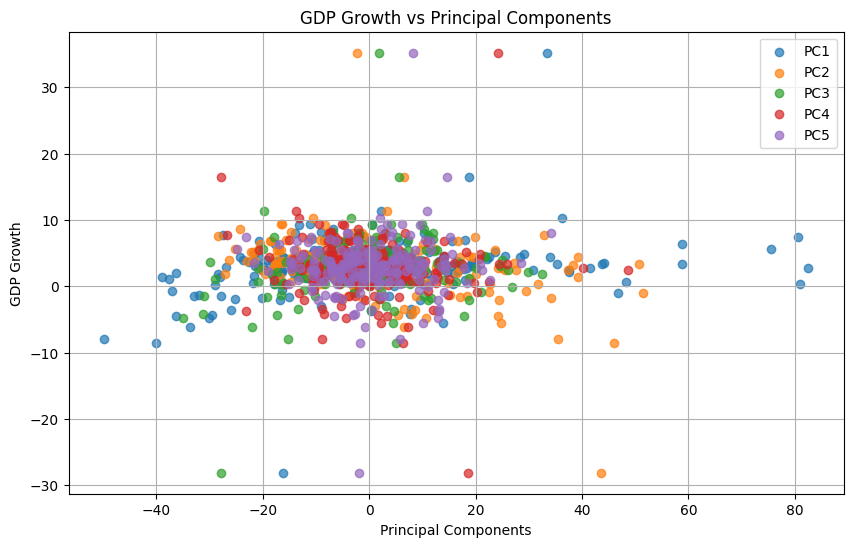

In [74]:
# Perform PCA with more components
n_components = 5  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df[topic_columns])

# Add all components to the DataFrame
for i in range(n_components):
    df[f"PC{i + 1}"] = principal_components[:, i]

# Optional: Plot additional components against GDP growth
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.scatter(df[f"PC{i + 1}"], df["real_GDP_change"], alpha=0.7, label=f"PC{i + 1}")

plt.xlabel("Principal Components")
plt.ylabel("GDP Growth")
plt.title("GDP Growth vs Principal Components")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# Get the loadings
loadings = pd.DataFrame(pca.components_, columns=topic_columns, index=[f"PC{i+1}" for i in range(n_components)])

# Explained variance ratio
explained_variance = pd.DataFrame({
    "Component": [f"PC{i+1}" for i in range(n_components)],
    "Explained Variance Ratio": pca.explained_variance_ratio_
})

print("Explained Variance by Components:\n", explained_variance)

loadings


Explained Variance by Components:
   Component  Explained Variance Ratio
0       PC1                  0.369385
1       PC2                  0.194018
2       PC3                  0.095873
3       PC4                  0.078945
4       PC5                  0.063897


,Employment,Prices,Consumption,Manufacturing,Construction,Lending,Uncertainty,Resources,Transportation,Outlook,Labor,Capital,Trade
PC1,-0.291358,0.421652,-0.303059,-0.209405,-0.225165,-0.249707,0.115524,-0.027311,0.314949,-0.031215,0.575318,-0.110814,0.176192
PC2,0.057870,0.338718,0.487275,0.214741,0.467496,0.290395,0.283880,-0.034509,0.305557,0.243379,0.236293,0.060042,-0.040905
PC3,-0.421851,0.019957,-0.366442,-0.418111,0.506218,0.296605,0.244092,-0.030668,-0.102759,-0.003190,-0.276619,-0.141259,0.027429
PC4,0.051252,-0.451265,-0.065232,0.268939,0.246386,-0.336872,0.381562,-0.127438,0.074670,-0.063885,0.053561,-0.020956,0.606767
PC5,0.054979,0.311058,0.033929,-0.037099,-0.449980,0.101047,0.575547,0.180626,-0.184572,0.145771,-0.341360,0.302577,0.240260


PC1 - Labor is biggest driver and is positive, as is prices
    Employment and construction have strong negative weights
    GPT: "PC1 appears to represent a labor-prices dynamic, where high labor emphasis correlates inversely with topics like Employment and Consumption."
    Me: An increase in labor problems and higher prices could be positively associated with GDP growth because labor shortages are a good thing (you're trying to hire) and higher prices are pushed up by higher demand.

PC2 - Positive contributors: Consumption, construction, transportation, prices
    Negative: Almost none
    GPT: "PC2 highlights consumption and infrastructure dynamics (e.g., Construction, Transportation), showing that these topics capture variance orthogonal to PC1."

PC1 may reflect labor dynamics vs consumption/employment.
PC2 may highlight consumption and infrastructure-related activity.
PC3 likely captures construction lending vs employment-related sectors.

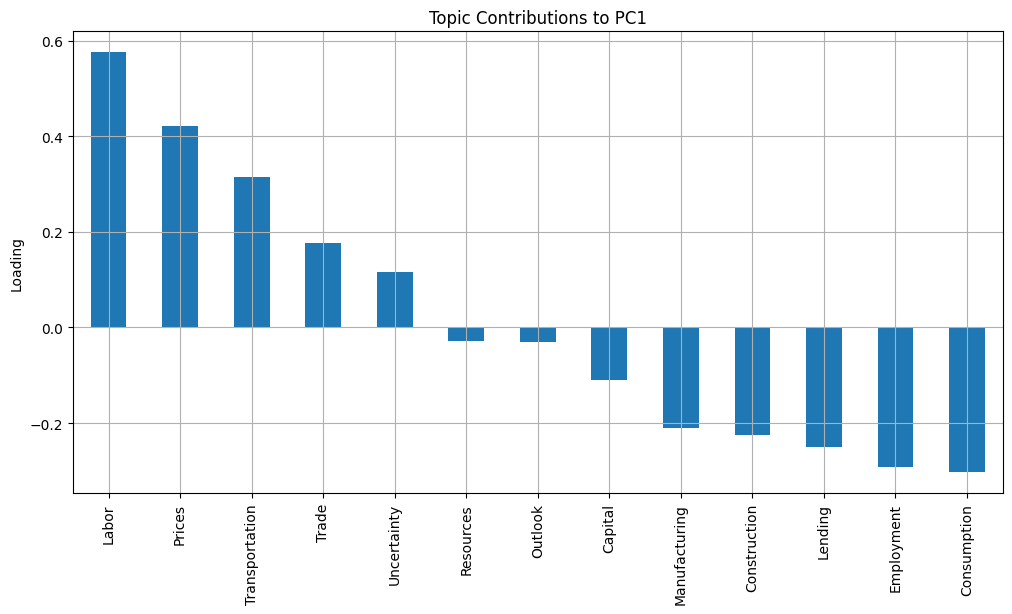

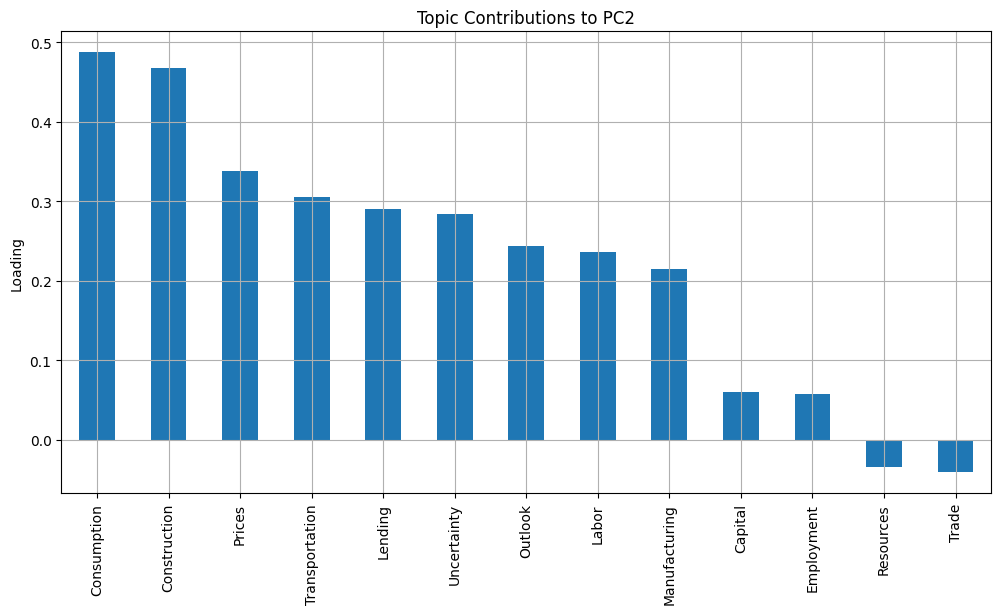

In [76]:
import matplotlib.pyplot as plt

# Plot loadings for PC1
plt.figure(figsize=(12, 6))
loadings.loc["PC1"].sort_values(ascending=False).plot(kind="bar")
plt.title("Topic Contributions to PC1")
plt.ylabel("Loading")
plt.grid(True)
plt.show()

# Repeat for PC2
plt.figure(figsize=(12, 6))
loadings.loc["PC2"].sort_values(ascending=False).plot(kind="bar")
plt.title("Topic Contributions to PC2")
plt.ylabel("Loading")
plt.grid(True)
plt.show()


In [77]:
# Correlation between PCs and GDP growth
correlations = df[["PC1", "PC2", "PC3", "PC4", "PC5", "real_GDP_change"]].corr()

# Display correlations
print(correlations["real_GDP_change"].sort_values(ascending=False))


real_GDP_change    1.000000
PC1                0.256901
PC3                0.185644
PC5                0.056791
PC4               -0.087648
PC2               -0.357226
Name: real_GDP_change, dtype: float64


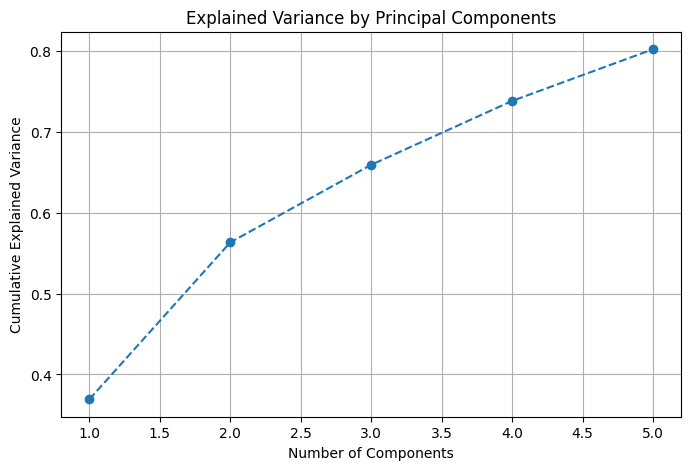

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Use PC1 and PC2 as predictors
X = df[["PC1", "PC2"]]
y = df["real_GDP_change"]

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Evaluate the model
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R² Score: 0.19360850245612338
Coefficients: [ 0.05220026 -0.10015426]
Intercept: 2.8612903225806448
